In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Os dados trabalhados dizem a respeito de pedidos de cartões de crédito.  Todos os nomes de atributos e valores foram alterados para símbolos sem sentido para proteger a confidencialidade dos dados.
  
Este conjunto de dados possui uma boa mistura de atributos: contínuos, nominais com pequenos números de valores, e nominais com maior número de valores. Existem também alguns dados nulos.

O problema a ser tratado com esse dataset é um problema de classificação, a variável resposta é a A16, um pedido de cartão pode ser classificado como + (aprovado) ou como - (reprovado).

Informações sobre as variáveis

```
    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
```

## Importando e Explorando os Dados

In [2]:
data = pd.read_csv('/content/gdrive/My Drive/data/crx.data', sep = ",")

# Visualização dos dados 
print(data.shape)
data.head(5)

(690, 15)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


Ao visualizar os dados nota-se que a variável A1 (como descrita no arquivo crx.names) não está representando duas classes: 
    A1:	b, a.

E sim uma variável contínua, que deveria ser a A2, os valores de a, b acabaram indo para o index, iremos corrigir isso e renomear as variáveis.

In [3]:
data = data.rename_axis('A1').reset_index()
data.head(5)

,A1,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
d = {'A1' : 'A1',	'a1':'A2',	'a2':'A3',	'a3':'A4',	'a4':'A5',	'a5':'A6',	'a6':'A7',	'a7':'A8',	'a8':'A9',	'a9':'A10',	'a10':'A11',	'a11':'A12',	'a12':'A13',	'a13':'A14',	'a14':'A15',	'a15': 'A16'}

data.rename(columns = d, inplace = True)
data.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Média, desvio padrão, min, max e quartis de todas as variáveis numéricas

In [5]:
data.describe() 

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


Nem todas as variáveis descritas como contínuas na descrição do dataset foram lidas como contínuas pelo python, isso será corrigido. No dataset os valores nulos estão sendo representados por ?, portanto iremos substitui-los pelo valor nulo do numpy para ficar mais fácil trabalhar com eles

In [6]:
data = data.replace('?', np.nan)

data["A2"] = data["A2"].astype(np.float16)
data["A14"] = data["A14"].astype(np.float16)
data_sem_nulos = data.dropna(subset=['A2', 'A3', 'A8', 'A11', 'A14', 'A15'])
data_sem_nulos.describe() 

,A2,A3,A8,A11,A14,A15
count,666.000000,666.000000,666.000000,666.000000,666.00,666.000000
mean,31.562500,4.798078,2.222320,2.459459,inf,998.584084
std,11.921875,5.005309,3.347599,4.929794,inf,5202.975198
min,13.750000,0.000000,0.000000,0.000000,0.00,0.000000
25%,22.601562,1.010000,0.165000,0.000000,75.25,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.00,5.000000
75%,38.250000,7.207500,2.585000,3.000000,271.00,399.000000
max,80.250000,28.000000,28.500000,67.000000,2000.00,100000.000000


É interessante notar que o desvio padrão de muitas das variáveis chega a ser maior que sua média.

### Visualizando a distribuição das classes na variável resposta


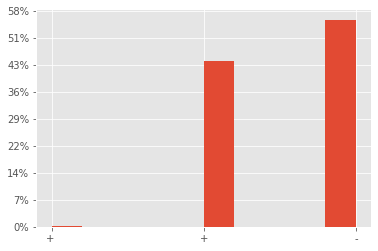

In [7]:
from matplotlib.ticker import PercentFormatter

plt.style.use('ggplot')
plt.hist(data["A16"])
plt.gca().yaxis.set_major_formatter(PercentFormatter(690))


Notamos que existem algumas instâncias onde a classe "+" está com espaços vazios na string, fazendo com que o histograma indique que "+" e "+ " são duas classes diferentes, o que não é o caso, portanto iremos realizar um trim nessa variável.

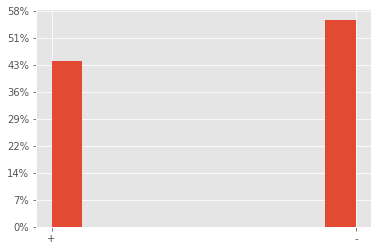

In [8]:
def strp(a):
  return a.strip()

data["A16"] = data["A16"].apply(strp)

plt.style.use('ggplot')
plt.hist(data["A16"])
plt.gca().yaxis.set_major_formatter(PercentFormatter(690))

In [9]:
data.A16.value_counts(normalize=True)

-    0.555072
+    0.444928
Name: A16, dtype: float64

Assim vemos que os dados estão distribuidos quase igualmente entre as duas classes, sendo os pedidos aprovados detentores de 44,5% do total e os reprovados de 55,5%

## Dados Nulos

Nesse gráfico o que está preenchido com preto são dados não nulos, além disso há uma barra no lado direito deste diagrama. Este é um gráfico de linha para a integridade dos dados de cada linha.




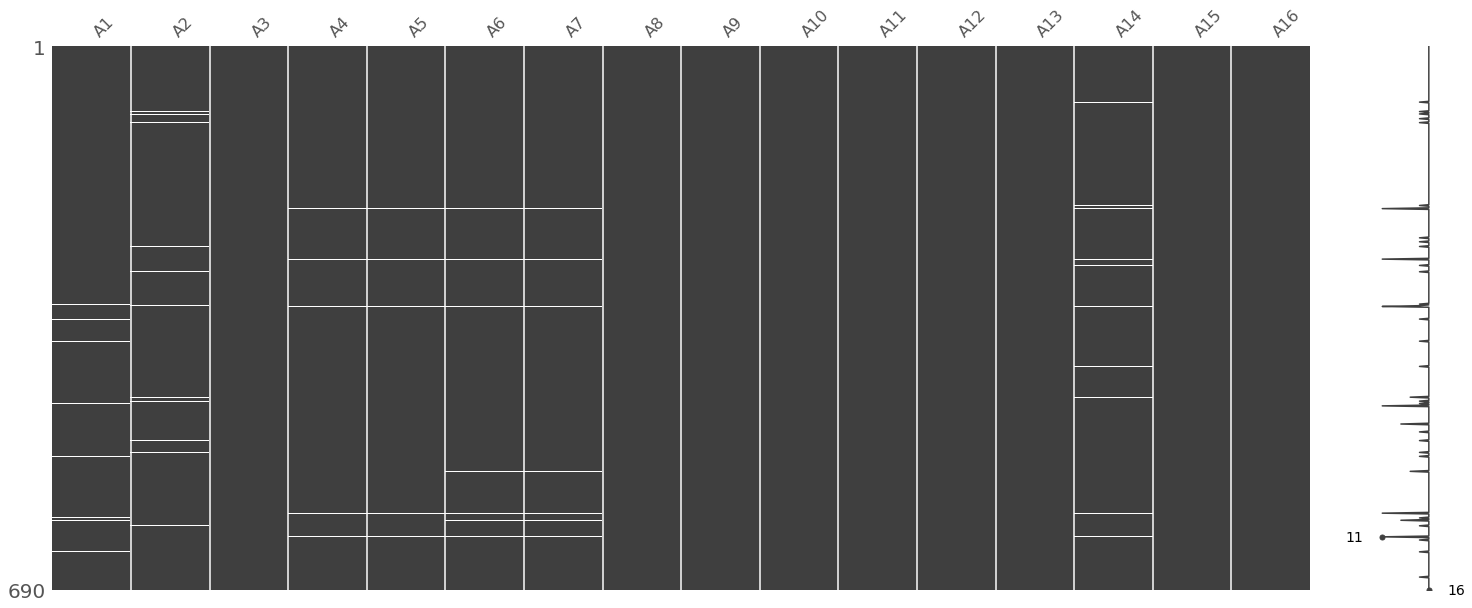

In [10]:
import missingno as msno
msno.matrix(data)

Dessa forma podemos visualizar que existem poucos dados faltantes nesse conjunto de dados, desse modo pode ser interessante apenas retirar-los pois não haveria uma perda grande de informação, ou retirar apenas aqueles que estão em variáveis categóricas e preencher com a média da coluna aqueles que se encontram em variáveis numéricas. Para essa análise preferimos retirar os dados nulos.


In [11]:
data = data.dropna()

## Visualizando a relação das variáveis categóricas com a variável resposta

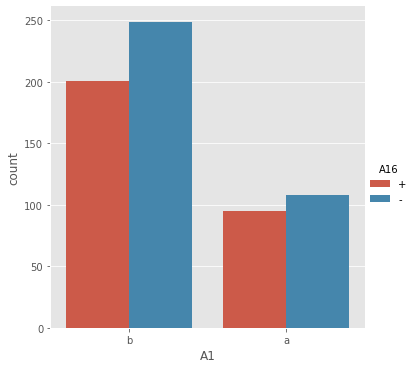

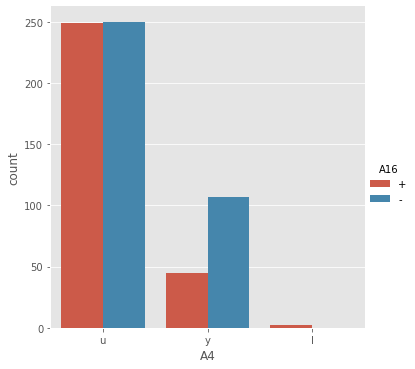

In [12]:
sns.catplot(x="A1", kind="count", hue="A16", data=data)
sns.catplot(x="A4", kind="count", hue="A16", data=data)

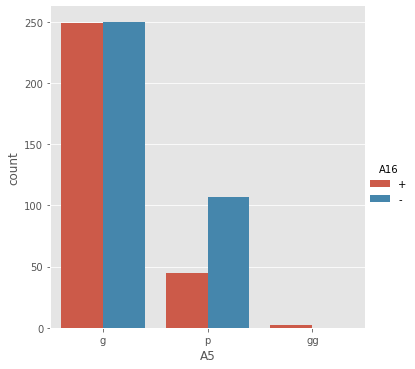

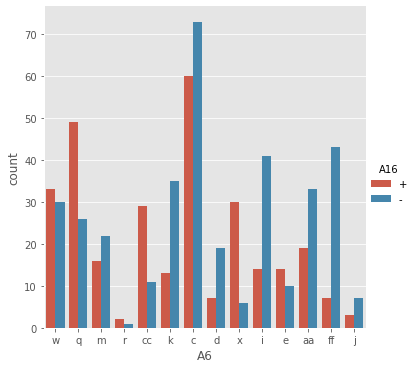

In [13]:
sns.catplot(x="A5", kind="count", hue="A16", data=data)
sns.catplot(x="A6", kind="count", hue="A16", data=data)

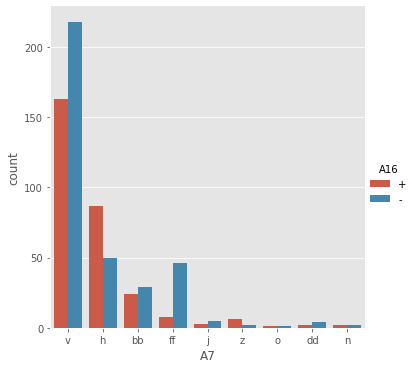

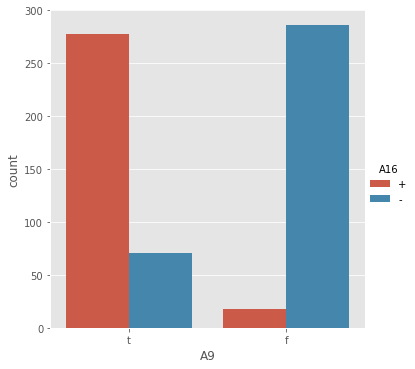

In [14]:
sns.catplot(x="A7", kind="count", hue="A16", data=data)
sns.catplot(x="A9", kind="count", hue="A16", data=data)

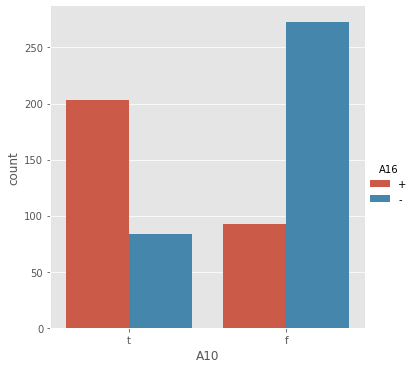

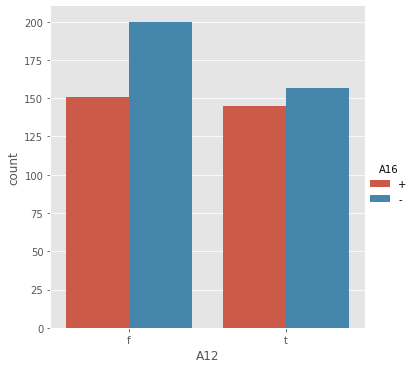

In [15]:
sns.catplot(x="A10", kind="count", hue="A16", data=data)
sns.catplot(x="A12", kind="count", hue="A16", data=data)

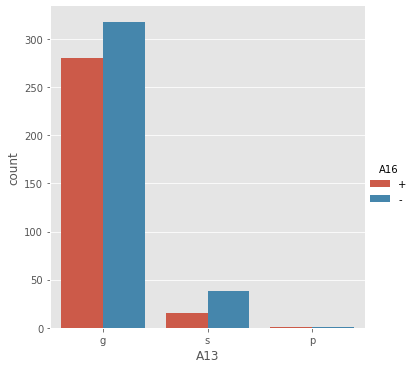

In [16]:
sns.catplot(x="A13", kind="count", hue="A16", data=data)

Pelos gráficos é possível notar uma relação de possível correlação entre a A9 e A16 e entre a A10 e A16, tornando A9 e A10 variáveis interessantes.

## Plotando as variáveis contínuas

<Figure size 576x576 with 0 Axes>

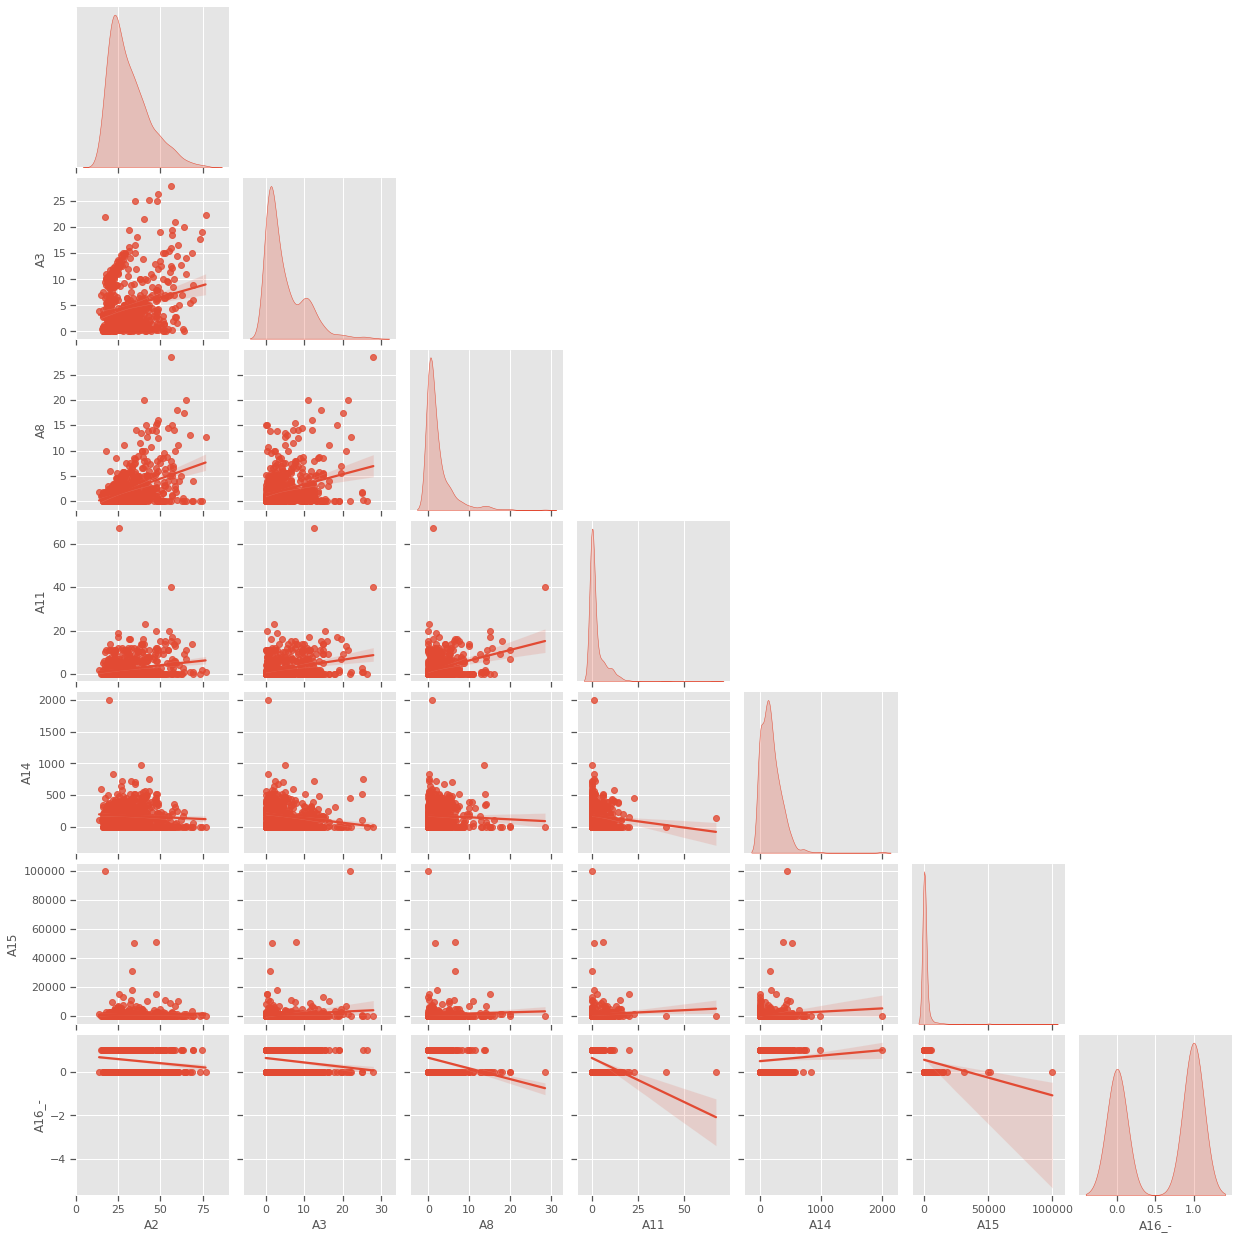

In [17]:
variaveis_pertinentes = data[["A16", "A2", "A3", "A8", "A11","A14", "A15"]].copy()
variaveis_pertinentes = pd.get_dummies(variaveis_pertinentes, columns=["A16"])
variaveis_pertinentes.drop(["A16_+"], axis=1, inplace=True) # Manter ambas as variáveis seria redundante
sns.set(style="ticks", color_codes=True)
plt.style.use('ggplot')
# Plotando a distribuição em pares das variáveis pertinentes e seus histogramas
plt.figure(figsize=(8,8))
sns.pairplot(variaveis_pertinentes,palette='coolwarm', corner=True, kind="reg", diag_kind="kde")
plt.show()

As variáveis contínuas, possuem uma distribuição bastante concentrada nos valores mais à esquerda do gráfico. As A3 e A2 são as que tem ainda uma distribuição mais "uniforme".

## Visualizando a Matriz de Correlação

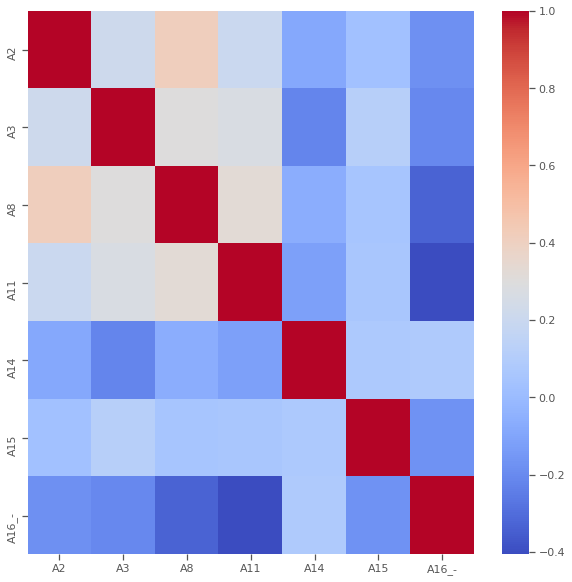

In [18]:
# Visualizando a matriz de correlação
corr = variaveis_pertinentes.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap= 'coolwarm')
plt.show()

A8 e A11 são as variáveis com maior correlação com a variável resposta A16_-, no entanto suas correlações não chegam a ser fortes.

## Criando Dummies para todas as variáveis categóricas

In [19]:
data_dummified = pd.get_dummies(data, columns = ["A1", "A4", "A5", "A6", "A7", "A9", "A10", "A12", "A13", "A16"], drop_first= True)

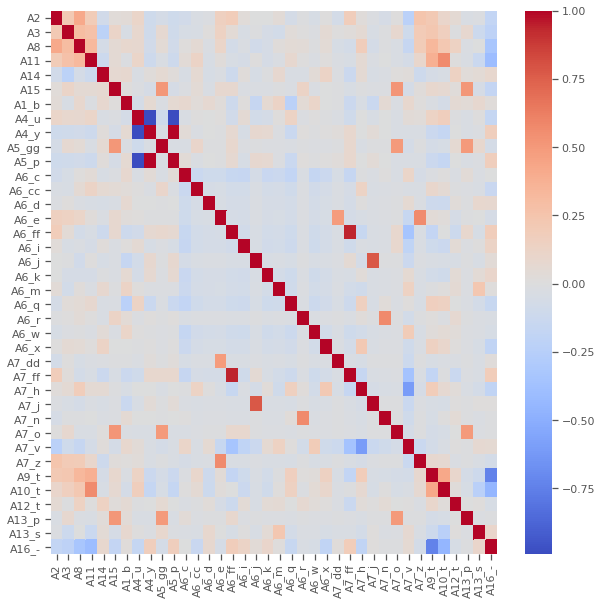

In [20]:
# Visualizando a matriz de correlação
corr = data_dummified.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap= 'coolwarm')
plt.show()

Dessa maneira vemos que A10_t seria a variável que possui maior correlação com A16_-